In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras import layers, callbacks
import math
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FTSA/data/AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.494320,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.110039,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.203342,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,17.080309,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.188478,258529600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2077 non-null   object 
 1   Open       2077 non-null   float64
 2   High       2077 non-null   float64
 3   Low        2077 non-null   float64
 4   Close      2077 non-null   float64
 5   Adj Close  2077 non-null   float64
 6   Volume     2077 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.7+ KB


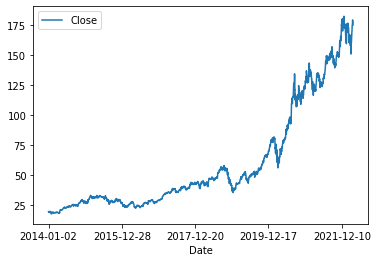

In [ ]:
data.plot('Date','Close')

In [ ]:
tf.random.set_seed(100)

In [ ]:
# 1. Filter out the closing market price data
close_data = data.filter(['Close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 80% of the data
training_data_len = math.ceil(len(dataset) *.8)
train_data = scaled_data[0:training_data_len  , : ]
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [ ]:
x_train_data2.shape

(1602, 60, 1)

In [ ]:
# Create LSTM Model
def createLSTM():
  model = Sequential()
  model.add(LSTM(units=64, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
  model.add(LSTM(units=64, return_sequences=False))
  model.add(Dense(units=25))
  model.add(Dense(units=1))
  model.compile(optimizer='adam', loss='mse')
  return model

# Create GRU model
def createGRU():
  model = Sequential()
  model.add(GRU (units = 64, return_sequences = True, input_shape = (x_train_data2.shape[1],1)))  
  model.add(LSTM(units=64, return_sequences=False))
  model.add(Dense(units=25))
  model.add(Dense(units=1))
  # model.add(Dropout(0.2)) 
  # model.add(GRU(units = 64))                 
  # model.add(Dropout(0.2))
  # model.add(Dense(units=1)) 
  model.compile(optimizer='adam',loss='mse')   
  return model

# Create BiLSTM model
def createBiLSTM():
  model = Sequential()
  model.add(Bidirectional(LSTM(units=64, return_sequences=True),input_shape=(x_train_data2.shape[1],1)))
# model.add(Bidirectional(LSTM(units=64)))

  model.add(LSTM(units=64, return_sequences=False))
  model.add(Dense(units=25))
  model.add(Dense(units=1))
# model.add(Dense(units=1))
  model.compile(optimizer='adam',loss='mse')
  return model

In [ ]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)
    history = model.fit(x_train_data2, y_train_data1, epochs = 10, validation_split = 0.2,
                    batch_size = 1, shuffle = False, callbacks = [early_stop])
    return history

In [ ]:
LSTMmodel = createLSTM()
LSTMmodel.fit(x_train_data2, y_train_data1, batch_size=1, epochs=5)

Epoch 1/5
1602/1602 [==============================] - 46s 27ms/step - loss: 6.3907e-04
Epoch 2/5
1602/1602 [==============================] - 43s 27ms/step - loss: 2.4161e-04
Epoch 3/5
1602/1602 [==============================] - 43s 27ms/step - loss: 1.3262e-04
Epoch 4/5
1602/1602 [==============================] - 44s 28ms/step - loss: 1.5508e-04
Epoch 5/5
1602/1602 [==============================] - 44s 27ms/step - loss: 1.2700e-04


In [ ]:
GRUmodel = createGRU()
GRUmodel.fit(x_train_data2, y_train_data1, batch_size=1, epochs=5)

Epoch 1/5
1602/1602 [==============================] - 46s 27ms/step - loss: 3.0725e-04
Epoch 2/5
1602/1602 [==============================] - 43s 27ms/step - loss: 1.5202e-04
Epoch 3/5
1602/1602 [==============================] - 43s 27ms/step - loss: 1.2751e-04
Epoch 4/5
1602/1602 [==============================] - 43s 27ms/step - loss: 1.3007e-04
Epoch 5/5
1602/1602 [==============================] - 43s 27ms/step - loss: 1.1261e-04


In [ ]:
BiLSTMmodel = createBiLSTM()
BiLSTMmodel.fit(x_train_data2, y_train_data1, batch_size=1, epochs=5)

Epoch 1/5
1602/1602 [==============================] - 59s 34ms/step - loss: 3.4199e-04
Epoch 2/5
1602/1602 [==============================] - 55s 34ms/step - loss: 2.1172e-04
Epoch 3/5
1602/1602 [==============================] - 55s 34ms/step - loss: 1.2354e-04
Epoch 4/5
1602/1602 [==============================] - 55s 34ms/step - loss: 1.3064e-04
Epoch 5/5
1602/1602 [==============================] - 55s 34ms/step - loss: 1.1873e-04


In [ ]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# 3. Making predictions on the testing data
LSTMpredictions = LSTMmodel.predict(x_test)
LSTMpredictions = scaler.inverse_transform(LSTMpredictions)

In [ ]:
# 3. Making predictions on the testing data
GRUpredictions = GRUmodel.predict(x_test)
GRUpredictions = scaler.inverse_transform(GRUpredictions)

In [ ]:
# 3. Making predictions on the testing data
BiLSTMpredictions = BiLSTMmodel.predict(x_test)
BiLSTMpredictions = scaler.inverse_transform(BiLSTMpredictions)

In [ ]:
def result(predictions, y_test, mName):
  mae = np.mean(np.abs(predictions - y_test)) 
  mpe = np.mean((predictions - y_test)/y_test)*100
  rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
  mape = np.mean(np.abs(predictions - y_test)/np.abs(y_test))*100
  print("MAE: {:.2f}".format(mae))
  print("MPE: {:.2f} %".format(mpe))
  print("RMSE: {:.2f}".format(rmse))
  print("MAPE: {:.2f} %".format(mape))

  train = data[:training_data_len]
  valid = data[training_data_len:]  
  valid['Predictions'] = predictions
  plt.figure(figsize=(20, 5))
  plt.title(mName + ' Model')
  plt.xlabel('Date')
  plt.ylabel('Close')
  plt.plot(train['Close'],'blue')
  plt.plot(valid['Close'], 'red')
  plt.plot(valid['Predictions'],'green')
  plt.legend(['Training Set', 'Validation Set', 'Predictions'], loc='upper left')
  plt.xticks(np.arange(0,2078,200), data.Date[0:2078:200]) 
  plt.show()

MAE: 4.43
MPE: 3.09 %
RMSE: 5.08
MAPE: 3.22 %


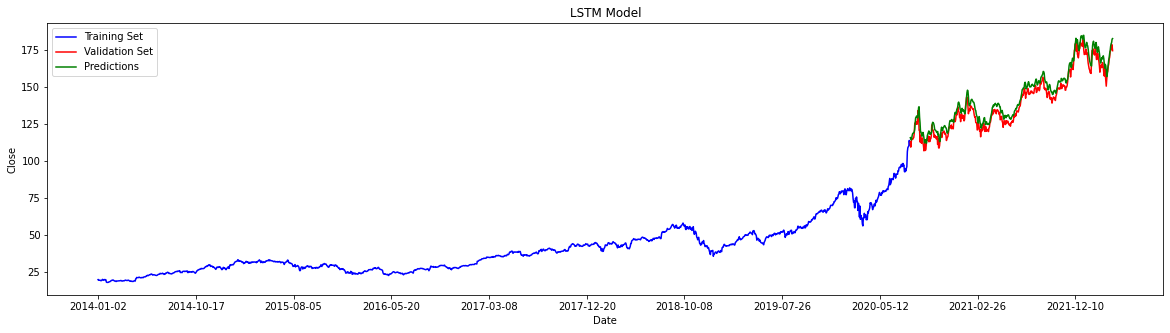

In [ ]:
result(LSTMpredictions,y_test, 'LSTM')

MAE: 2.02
MPE: 0.38 %
RMSE: 2.65
MAPE: 1.47 %


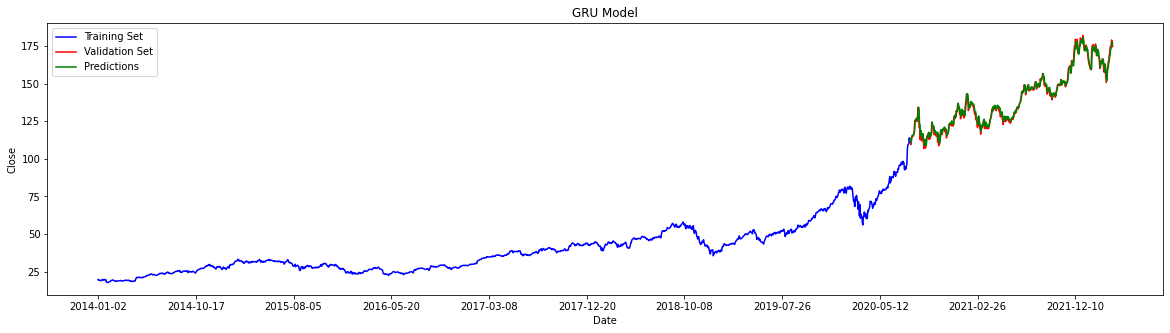

In [ ]:
result(GRUpredictions,y_test, 'GRU')

MAE: 2.98
MPE: 1.82 %
RMSE: 3.63
MAPE: 2.17 %


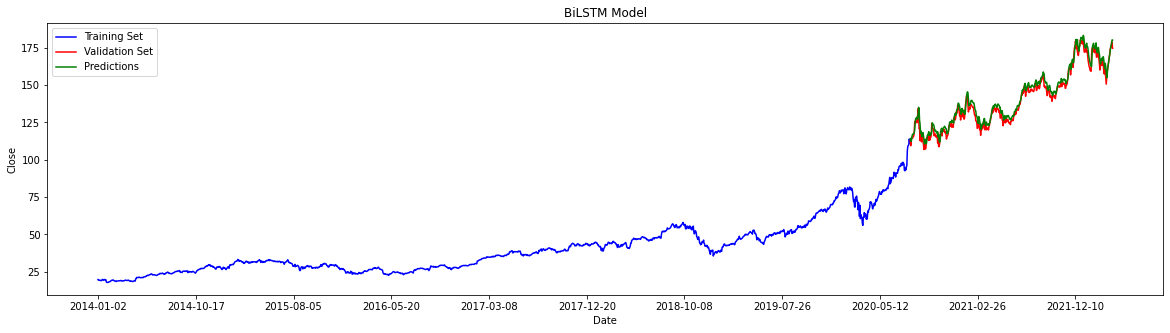

In [ ]:
result(BiLSTMpredictions,y_test, 'BiLSTM')